<a href="https://colab.research.google.com/github/Jmontoyaor/Computational-electromagnetics/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo-1

# 🔧 Método de Elementos Finitos (MEF)

## Ejemplo 6.1: Ensamblaje de Matriz Global

---

## 📐 Paso 1: Definición de Matrices Elementales

Matrices elementales 2x2 para cada subdominio:

Ω₁ (nodos 1-2):
[['a₀₀[1]' 'a₀₁[1]']
 ['a₁₀[1]' 'a₁₁[1]']]

Ω₂ (nodos 2-3):
[['a₀₀[2]' 'a₀₁[2]']
 ['a₁₀[2]' 'a₁₁[2]']]

Ω₃ (nodos 3-4):
[['a₀₀[3]' 'a₀₁[3]']
 ['a₁₀[3]' 'a₁₁[3]']]

Ω₄ (nodos 4-5):
[['a₀₀[4]' 'a₀₁[4]']
 ['a₁₀[4]' 'a₁₁[4]']]



---

## 🔨 Paso 2: Proceso de Ensamblaje


ENSAMBLAJE NODO POR NODO

📍 NODO 1 - Solo pertenece a Ω₁

Matriz global después del nodo 1:
[['a₀₀[1]' 'a₀₁[1]']
 ['a₁₀[1]' 'a₁₁[1]']]

📍 NODO 2 - Pertenece a Ω₁ y Ω₂ (SUMA DE CONTRIBUCIONES)

Matriz global después del nodo 2:
[['a₀₀[1]' 'a₀₁[1]' '0']
 ['a₁₀[1]' 'a₁₁[1] + a₀₀[2]' 'a₀₁[2]']
 ['0' 'a₁₀[2]' 'a₁₁[2]']]

📍 NODO 3 - Pertenece a Ω₂ y Ω₃ (SUMA DE CONTRIBUCIONES)

Matriz global después del nodo 3:
[['a₀₀[1]' 'a₀₁[1]' '0' '0']
 ['a₁₀[1]' 'a₁₁[1] + a₀₀[2]' 'a₀₁[2]' '0']
 ['0' 'a₁₀[2]' 'a₁₁[2] + a₀₀[3]' 'a₀₁[3]']
 ['0' '0' 'a₁₀[3]' 'a₁₁[3]']]

📍 NODO 4 - Pertenece a Ω₃ y Ω₄ (SUMA DE CONTRIBUCIONES)

Matriz global después del nodo 4:
[['a₀₀[1]' 'a₀₁[1]' '0' '0' '0']
 ['a₁₀[1]' 'a₁₁[1] + a₀₀[2]' 'a₀₁[2]' '0' '0']
 ['0' 'a₁₀[2]' 'a₁₁[2] + a₀₀[3]' 'a₀₁[3]' '0']
 ['0' '0' 'a₁₀[3]' 'a₁₁[3] + a₀₀[4]' 'a₀₁[4]']
 ['0' '0' '0' 'a₁₀[4]' 'a₁₁[4]']]

📍 NODO 5 - Solo pertenece a Ω₄

Matriz global FINAL (5×5):
  [        a₀₀[1]                a₀₁[1]                  0                     0     

---

## 🎯 Paso 3: Estructura Tridiagonal


✅ OBSERVACIONES:
  • La matriz es TRIDIAGONAL (valores solo en diagonal y adyacentes)
  • Cada nodo interior tiene SUMA de contribuciones de elementos vecinos
  • Los nodos extremos (1 y 5) solo tienen un elemento asociado
  • Esta estructura es característica de problemas 1D en MEF


---

## 🔢 Ejemplo Numérico

### Caso: Elemento lineal con k=1, longitud L=1m


Parámetros:
  Longitud total: 1 m
  Número de elementos: 4
  Longitud por elemento: 0.25 m
  Conductividad σ: 1.0

Matriz elemental numérica (σ/L):
[[ 4. -4.]
 [-4.  4.]]

Matriz global numérica ensamblada (5×5):
[[ 4. -4.  0.  0.  0.]
 [-4.  8. -4.  0.  0.]
 [ 0. -4.  8. -4.  0.]
 [ 0.  0. -4.  8. -4.]
 [ 0.  0.  0. -4.  4.]]

Verificación de estructura tridiagonal:
  Diagonal principal: [4. 8. 8. 8. 4.]
  Diagonal superior: [-4. -4. -4. -4.]
  Diagonal inferior: [-4. -4. -4. -4.]


---

## 📊 Visualizaciones

/tmp/ipython-input-4213852668.py:320: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4213852668.py:320: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4213852668.py:321: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  plt.savefig('fem_assembly.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-4213852668.py:321: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Liberation Sans.
  plt.savefig('fem_assembly.png', dpi=300, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Liberation Sans.
  fig.canvas.print

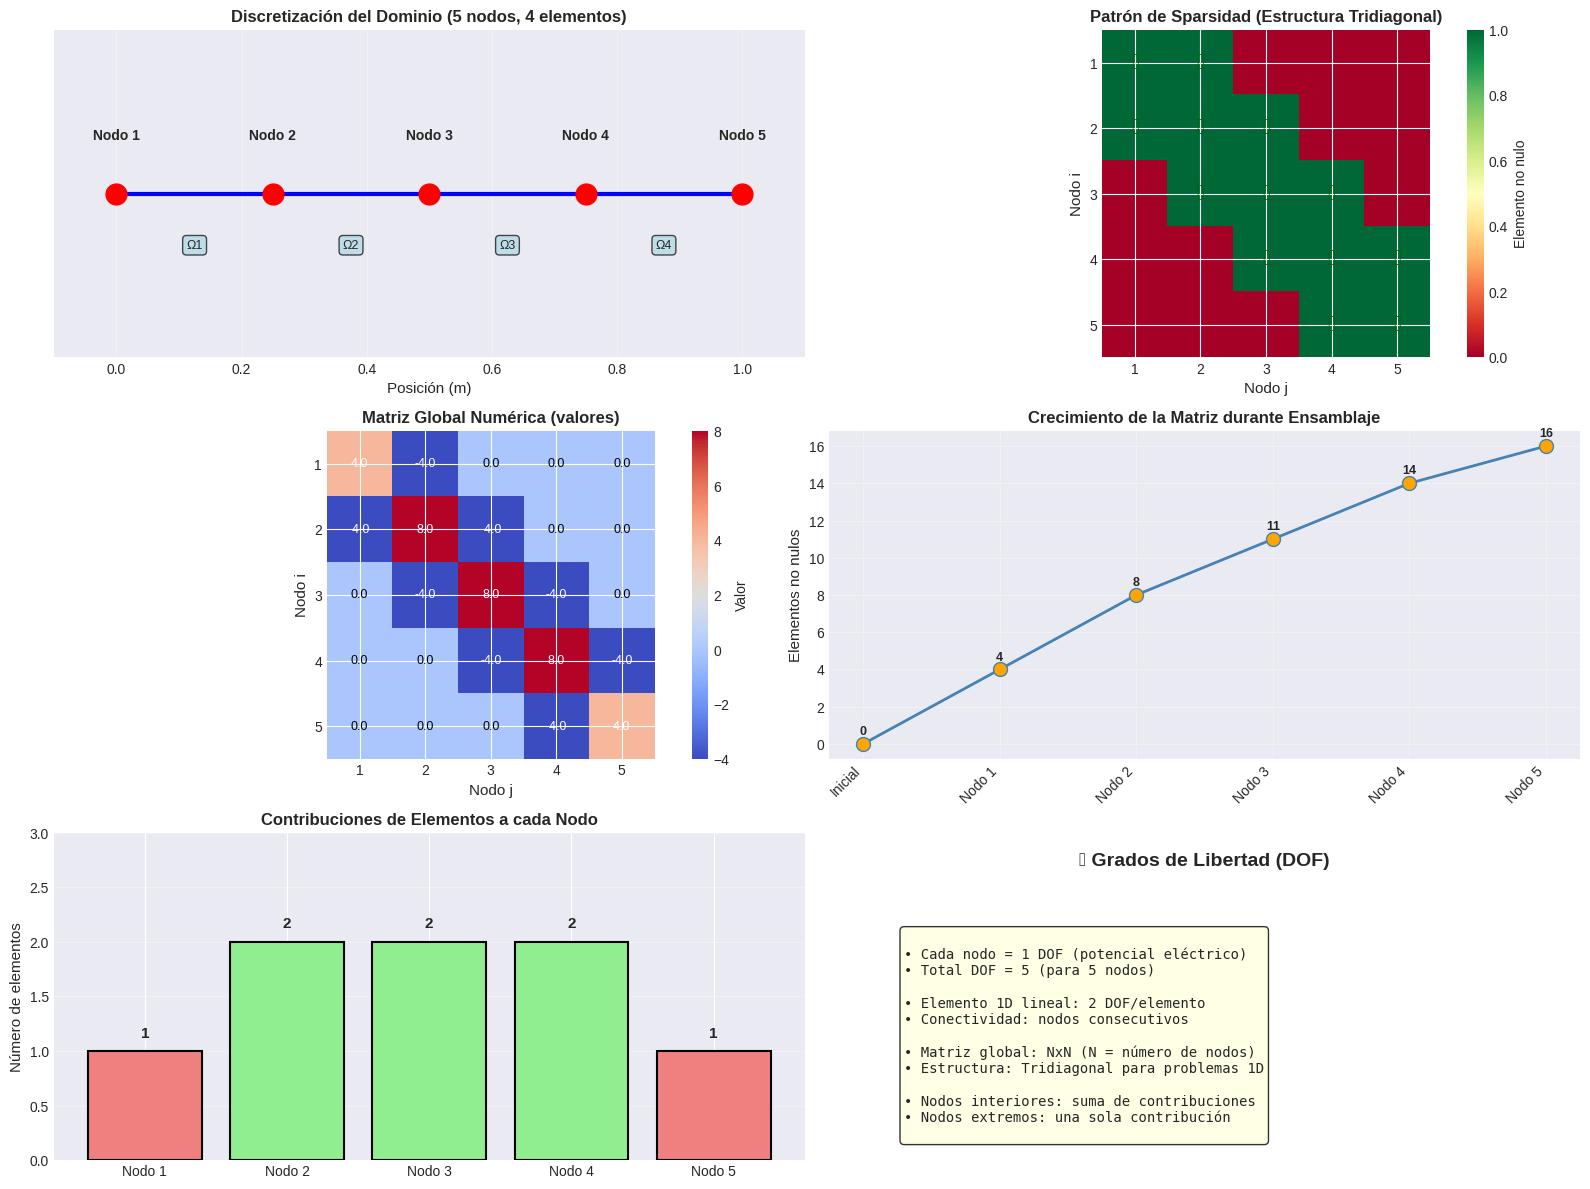

---


## 🎯 Resumen del Método

### Proceso de Ensamblaje:
1. **Discretizar** el dominio en elementos finitos
2. **Calcular** matrices elementales locales (2×2)
3. **Ensamblar** sumando contribuciones en nodos compartidos
4. **Obtener** matriz global tridiagonal

### Características:
- ✅ Matriz **simétrica** (para problemas auto-adjuntos)
- ✅ Estructura **sparse** (tridiagonal en 1D)
- ✅ Nodos interiores reciben **múltiples contribuciones**
- ✅ Eficiencia computacional para sistemas grandes

### Ecuación del sistema:
**A · V = F**

Donde:
- **A**: Matriz global (rigidez)
- **V**: Vector de incógnitas (potenciales nodales)
- **F**: Vector de términos fuente (excitación)



✅ ENSAMBLAJE COMPLETADO


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch
from IPython.display import display, Markdown

# Configuración de estilo
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

# ============================================================================
# MÉTODO DE ELEMENTOS FINITOS - EJEMPLO 6.1
# Ensamblaje de matriz global para 5 nodos
# ============================================================================

display(Markdown("# 🔧 Método de Elementos Finitos (MEF)"))
display(Markdown("## Ejemplo 6.1: Ensamblaje de Matriz Global"))
display(Markdown("---"))

# ============================================================================
# DEFINICIÓN DE MATRICES ELEMENTALES
# ============================================================================

display(Markdown("## 📐 Paso 1: Definición de Matrices Elementales"))

# Para este ejemplo, usamos matrices elementales 2x2 genéricas
# Cada elemento conecta dos nodos consecutivos

# Matriz elemental para Ω₁ (nodos 1-2)
A_elem1 = np.array([
    ['a₀₀[1]', 'a₀₁[1]'],
    ['a₁₀[1]', 'a₁₁[1]']
], dtype=object)

# Matriz elemental para Ω₂ (nodos 2-3)
A_elem2 = np.array([
    ['a₀₀[2]', 'a₀₁[2]'],
    ['a₁₀[2]', 'a₁₁[2]']
], dtype=object)

# Matriz elemental para Ω₃ (nodos 3-4)
A_elem3 = np.array([
    ['a₀₀[3]', 'a₀₁[3]'],
    ['a₁₀[3]', 'a₁₁[3]']
], dtype=object)

# Matriz elemental para Ω₄ (nodos 4-5)
A_elem4 = np.array([
    ['a₀₀[4]', 'a₀₁[4]'],
    ['a₁₀[4]', 'a₁₁[4]']
], dtype=object)

print("Matrices elementales 2x2 para cada subdominio:")
print(f"\nΩ₁ (nodos 1-2):\n{A_elem1}\n")
print(f"Ω₂ (nodos 2-3):\n{A_elem2}\n")
print(f"Ω₃ (nodos 3-4):\n{A_elem3}\n")
print(f"Ω₄ (nodos 4-5):\n{A_elem4}\n")

# ============================================================================
# PROCESO DE ENSAMBLAJE PASO A PASO
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🔨 Paso 2: Proceso de Ensamblaje"))

# Inicializar matriz global 5x5 con strings
n_nodes = 5
A_global = np.zeros((n_nodes, n_nodes), dtype=object)
for i in range(n_nodes):
    for j in range(n_nodes):
        A_global[i, j] = '0'

print("\n" + "="*70)
print("ENSAMBLAJE NODO POR NODO")
print("="*70)

# NODO 1 (n=1): Solo Ω₁
print("\n📍 NODO 1 - Solo pertenece a Ω₁")
A_global[0:2, 0:2] = A_elem1
print("\nMatriz global después del nodo 1:")
print(A_global[:2, :2])

# NODO 2 (n=2): Ω₁ y Ω₂ se superponen
print("\n📍 NODO 2 - Pertenece a Ω₁ y Ω₂ (SUMA DE CONTRIBUCIONES)")
A_global[1, 1] = f"{A_elem1[1,1]} + {A_elem2[0,0]}"
A_global[1:3, 2] = A_elem2[:, 1]
A_global[2, 1:3] = A_elem2[1, :]
print("\nMatriz global después del nodo 2:")
print(A_global[:3, :3])

# NODO 3 (n=3): Ω₂ y Ω₃ se superponen
print("\n📍 NODO 3 - Pertenece a Ω₂ y Ω₃ (SUMA DE CONTRIBUCIONES)")
A_global[2, 2] = f"{A_elem2[1,1]} + {A_elem3[0,0]}"
A_global[2:4, 3] = A_elem3[:, 1]
A_global[3, 2:4] = A_elem3[1, :]
print("\nMatriz global después del nodo 3:")
print(A_global[:4, :4])

# NODO 4 (n=4): Ω₃ y Ω₄ se superponen
print("\n📍 NODO 4 - Pertenece a Ω₃ y Ω₄ (SUMA DE CONTRIBUCIONES)")
A_global[3, 3] = f"{A_elem3[1,1]} + {A_elem4[0,0]}"
A_global[3:5, 4] = A_elem4[:, 1]
A_global[4, 3:5] = A_elem4[1, :]
print("\nMatriz global después del nodo 4:")
print(A_global[:5, :5])

# NODO 5 (n=5): Solo Ω₄
print("\n📍 NODO 5 - Solo pertenece a Ω₄")
print("\nMatriz global FINAL (5×5):")
print("="*70)

# Imprimir matriz global final con formato
for i in range(n_nodes):
    row = "  [ "
    for j in range(n_nodes):
        row += f"{A_global[i,j]:^20s}  "
    row += "]"
    print(row)

print("="*70)

# ============================================================================
# ESTRUCTURA TRIDIAGONAL
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🎯 Paso 3: Estructura Tridiagonal"))

print("\n✅ OBSERVACIONES:")
print("  • La matriz es TRIDIAGONAL (valores solo en diagonal y adyacentes)")
print("  • Cada nodo interior tiene SUMA de contribuciones de elementos vecinos")
print("  • Los nodos extremos (1 y 5) solo tienen un elemento asociado")
print("  • Esta estructura es característica de problemas 1D en MEF")

# ============================================================================
# EJEMPLO NUMÉRICO
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🔢 Ejemplo Numérico"))
display(Markdown("### Caso: Elemento lineal con k=1, longitud L=1m"))

# Supongamos elementos lineales con conductividad σ=1
# Matriz elemental típica para elemento lineal 1D:
# A_elem = (σ/L) * [[1, -1], [-1, 1]]

L_elem = 0.25  # Longitud de cada elemento (1m / 4 elementos)
sigma = 1.0    # Conductividad

# Matriz elemental numérica
A_num_elem = (sigma / L_elem) * np.array([[1, -1], [-1, 1]])

print(f"\nParámetros:")
print(f"  Longitud total: 1 m")
print(f"  Número de elementos: 4")
print(f"  Longitud por elemento: {L_elem} m")
print(f"  Conductividad σ: {sigma}")

print(f"\nMatriz elemental numérica (σ/L):")
print(A_num_elem)

# Ensamblar matriz global numérica
A_global_num = np.zeros((n_nodes, n_nodes))

# Elemento 1: nodos 0-1
A_global_num[0:2, 0:2] += A_num_elem

# Elemento 2: nodos 1-2
A_global_num[1:3, 1:3] += A_num_elem

# Elemento 3: nodos 2-3
A_global_num[2:4, 2:4] += A_num_elem

# Elemento 4: nodos 3-4
A_global_num[3:5, 3:5] += A_num_elem

print("\nMatriz global numérica ensamblada (5×5):")
print(A_global_num)

print(f"\nVerificación de estructura tridiagonal:")
print(f"  Diagonal principal: {np.diag(A_global_num)}")
print(f"  Diagonal superior: {np.diag(A_global_num, k=1)}")
print(f"  Diagonal inferior: {np.diag(A_global_num, k=-1)}")

# ============================================================================
# VISUALIZACIONES
# ============================================================================

display(Markdown("---"))
display(Markdown("## 📊 Visualizaciones"))

fig = plt.figure(figsize=(16, 12))

# Gráfica 1: Dominio discretizado
ax1 = plt.subplot(3, 2, 1)
node_positions = np.linspace(0, 1, 5)
for i, pos in enumerate(node_positions, 1):
    ax1.plot(pos, 0, 'ro', markersize=15, zorder=3)
    ax1.text(pos, 0.05, f'Nodo {i}', ha='center', fontsize=10, fontweight='bold')

for i in range(4):
    ax1.plot([node_positions[i], node_positions[i+1]], [0, 0], 'b-', linewidth=3)
    mid = (node_positions[i] + node_positions[i+1]) / 2
    ax1.text(mid, -0.05, f'Ω{i+1}', ha='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.15, 0.15)
ax1.set_xlabel('Posición (m)', fontsize=11)
ax1.set_title('Discretización del Dominio (5 nodos, 4 elementos)',
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_yticks([])

# Gráfica 2: Matriz global simbólica (patrón de sparsidad)
ax2 = plt.subplot(3, 2, 2)
pattern = np.zeros((5, 5))
pattern[0, 0:2] = 1
pattern[1, 0:3] = 1
pattern[2, 1:4] = 1
pattern[3, 2:5] = 1
pattern[4, 3:5] = 1

im = ax2.imshow(pattern, cmap='RdYlGn', interpolation='nearest', vmin=0, vmax=1)
ax2.set_xticks(range(5))
ax2.set_yticks(range(5))
ax2.set_xticklabels(range(1, 6))
ax2.set_yticklabels(range(1, 6))
ax2.set_xlabel('Nodo j', fontsize=11)
ax2.set_ylabel('Nodo i', fontsize=11)
ax2.set_title('Patrón de Sparsidad (Estructura Tridiagonal)',
              fontsize=12, fontweight='bold')

for i in range(5):
    for j in range(5):
        if pattern[i, j] > 0:
            ax2.text(j, i, '✓', ha='center', va='center',
                    fontsize=16, color='darkgreen', fontweight='bold')

plt.colorbar(im, ax=ax2, label='Elemento no nulo')

# Gráfica 3: Matriz global numérica
ax3 = plt.subplot(3, 2, 3)
im3 = ax3.imshow(A_global_num, cmap='coolwarm', interpolation='nearest')
ax3.set_xticks(range(5))
ax3.set_yticks(range(5))
ax3.set_xticklabels(range(1, 6))
ax3.set_yticklabels(range(1, 6))
ax3.set_xlabel('Nodo j', fontsize=11)
ax3.set_ylabel('Nodo i', fontsize=11)
ax3.set_title('Matriz Global Numérica (valores)', fontsize=12, fontweight='bold')

for i in range(5):
    for j in range(5):
        text = ax3.text(j, i, f'{A_global_num[i, j]:.1f}',
                       ha='center', va='center', fontsize=9,
                       color='white' if abs(A_global_num[i, j]) > 2 else 'black')

plt.colorbar(im3, ax=ax3, label='Valor')

# Gráfica 4: Proceso de ensamblaje por pasos
ax4 = plt.subplot(3, 2, 4)
steps = ['Inicial', 'Nodo 1', 'Nodo 2', 'Nodo 3', 'Nodo 4', 'Nodo 5']
nnz_counts = [0, 4, 8, 11, 14, 16]  # Número de elementos no nulos en cada paso

ax4.plot(range(len(steps)), nnz_counts, 'o-', linewidth=2, markersize=10,
         color='steelblue', markerfacecolor='orange')
ax4.set_xticks(range(len(steps)))
ax4.set_xticklabels(steps, rotation=45, ha='right')
ax4.set_ylabel('Elementos no nulos', fontsize=11)
ax4.set_title('Crecimiento de la Matriz durante Ensamblaje',
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

for i, (x, y) in enumerate(zip(range(len(steps)), nnz_counts)):
    ax4.text(x, y + 0.5, str(y), ha='center', fontsize=9, fontweight='bold')

# Gráfica 5: Contribuciones de elementos a cada nodo
ax5 = plt.subplot(3, 2, 5)
nodes = ['Nodo 1', 'Nodo 2', 'Nodo 3', 'Nodo 4', 'Nodo 5']
contributions = [1, 2, 2, 2, 1]  # Número de elementos que contribuyen

colors = ['lightcoral', 'lightgreen', 'lightgreen', 'lightgreen', 'lightcoral']
bars = ax5.bar(nodes, contributions, color=colors, edgecolor='black', linewidth=1.5)
ax5.set_ylabel('Número de elementos', fontsize=11)
ax5.set_title('Contribuciones de Elementos a cada Nodo',
              fontsize=12, fontweight='bold')
ax5.set_ylim(0, 3)
ax5.grid(True, axis='y', alpha=0.3)

for bar, val in zip(bars, contributions):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{val}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfica 6: Grados de libertad (DOF)
ax6 = plt.subplot(3, 2, 6)
ax6.text(0.5, 0.9, '📌 Grados de Libertad (DOF)', ha='center',
         fontsize=14, fontweight='bold', transform=ax6.transAxes)

info_text = """
• Cada nodo = 1 DOF (potencial eléctrico)
• Total DOF = 5 (para 5 nodos)

• Elemento 1D lineal: 2 DOF/elemento
• Conectividad: nodos consecutivos

• Matriz global: NxN (N = número de nodos)
• Estructura: Tridiagonal para problemas 1D

• Nodos interiores: suma de contribuciones
• Nodos extremos: una sola contribución
"""

ax6.text(0.1, 0.7, info_text, ha='left', va='top', fontsize=10,
         transform=ax6.transAxes, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

ax6.axis('off')

plt.tight_layout()
plt.savefig('fem_assembly.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN
# ============================================================================

display(Markdown("---"))
display(Markdown("""
## 🎯 Resumen del Método

### Proceso de Ensamblaje:
1. **Discretizar** el dominio en elementos finitos
2. **Calcular** matrices elementales locales (2×2)
3. **Ensamblar** sumando contribuciones en nodos compartidos
4. **Obtener** matriz global tridiagonal

### Características:
- ✅ Matriz **simétrica** (para problemas auto-adjuntos)
- ✅ Estructura **sparse** (tridiagonal en 1D)
- ✅ Nodos interiores reciben **múltiples contribuciones**
- ✅ Eficiencia computacional para sistemas grandes

### Ecuación del sistema:
**A · V = F**

Donde:
- **A**: Matriz global (rigidez)
- **V**: Vector de incógnitas (potenciales nodales)
- **F**: Vector de términos fuente (excitación)
"""))

print("\n" + "="*70)
print("✅ ENSAMBLAJE COMPLETADO")
print("="*70)

#Taller

Ejercicio 1

# 🧲 Potencial Vectorial Magnético - Conductor Finito

---

## 📊 Datos del Problema


| Parámetro | Valor | Unidad |
|-----------|-------|--------|
| Corriente (I) | 3.0 | A |
| Punto x | 0.05 | m |
| Punto y | 0.03 | m |
| Punto z | 0.1 | m |
| Límite inferior (-L₁) | -0.5 | m |
| Límite superior (L₂) | 0.5 | m |
| R = √(x² + y²) | 0.05830952 | m |
| μ₀ | 1.256637e-06 | H/m |


---

## 📐 Solución Analítica


🔢 Cálculos intermedios:
  L₂ - z = 0.4
  √(R² + (L₂-z)²) = 0.404228
  ln(0.804228) = -0.2178728924

  -L₁ - z = -0.6
  √(R² + (-L₁-z)²) = 0.602827
  ln(0.002827) = -5.8686541966

  Integral = 5.6507813042
  Prefactor μ₀I/(4π) = 3.0000000000e-07



### ✅ Resultado Analítico:
**Aₖ = 1.6952343913e-06 Wb/m**

**A⃗ = 1.695234e-06 âₖ Wb/m**


---

## 🔢 Solución Numérica - Método de Riemann (N=10)


Δz' = 0.1

Contribuciones por subintervalo:
  i     z'_i    distancia         término
---------------------------------------------
  1   -0.450   0.55308227    0.1808049272
  2   -0.350   0.45376205    0.2203798214
  3   -0.250   0.35482390    0.2818299444
  4   -0.150   0.25670995    0.3895446936
  5   -0.050   0.16093477    0.6213697660
  6    0.050   0.07681146    1.3018891098
  7    0.150   0.07681146    1.3018891098
  8    0.250   0.16093477    0.6213697660
  9    0.350   0.25670995    0.3895446936
 10    0.450   0.35482390    0.2818299444



### ✅ Resultado Numérico (N=10):
**Aₖ = 1.6771355328e-06 Wb/m**

**A⃗ = 1.677136e-06 âₖ Wb/m**


---

## 📊 Comparación de Resultados


| Método | Resultado (Wb/m) |
|--------|------------------|
| **Analítico** | 1.6952343913e-06 |
| **Numérico (N=10)** | 1.6771355328e-06 |
| **Error Absoluto** | 1.8098858433e-08 |
| **Error Relativo** | 1.0676 % |


---

## 📈 Visualizaciones

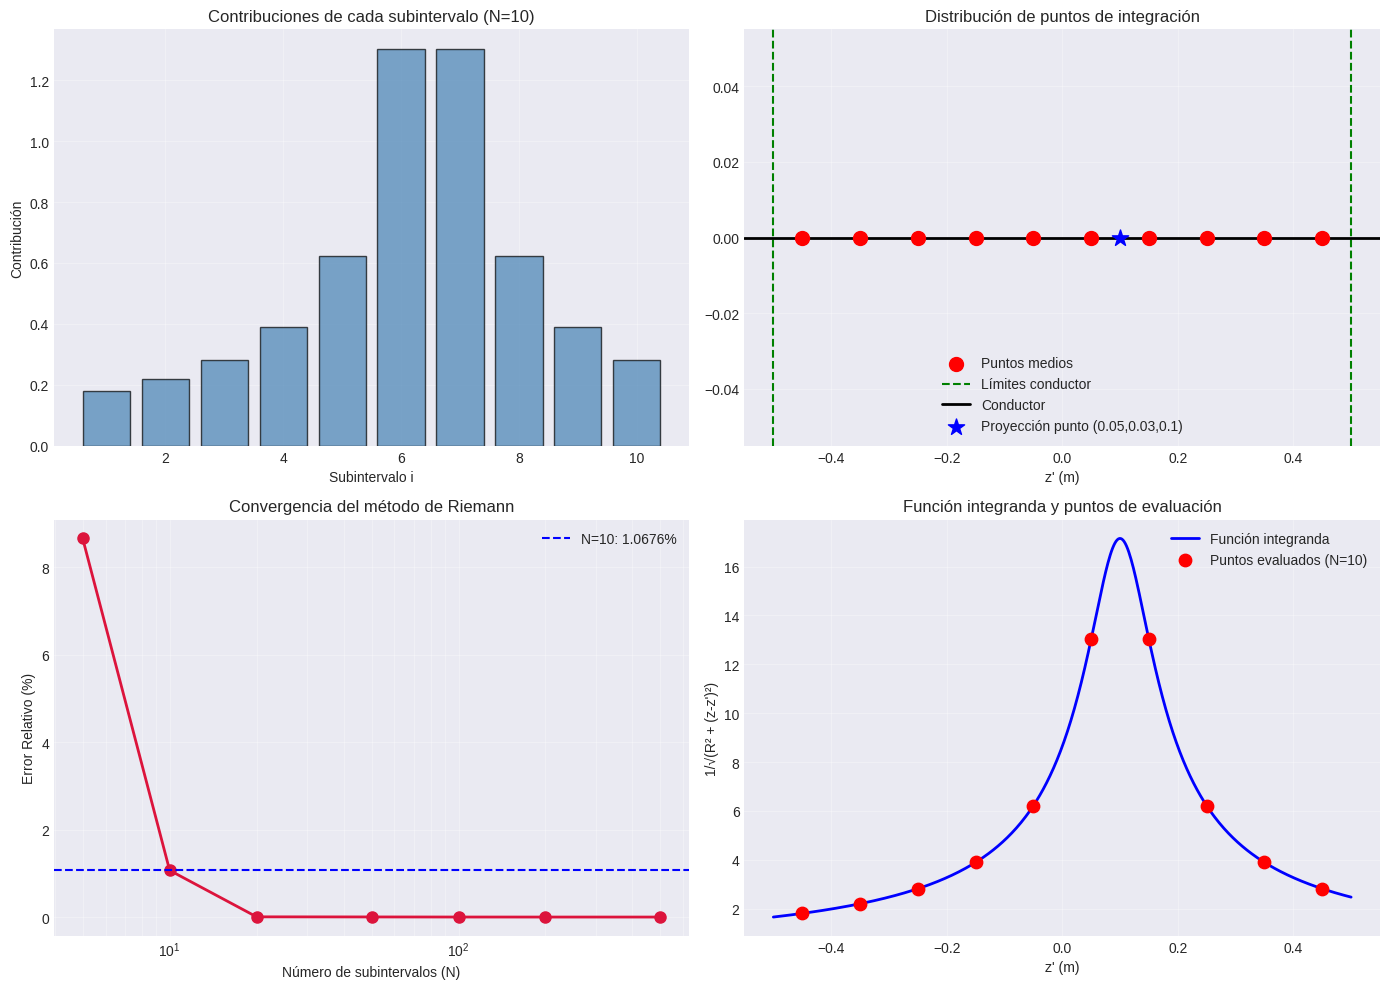

---


## 🎯 Resumen Final

El potencial vectorial magnético en el punto **(0.05, 0.03, 0.1) m** debido a un conductor 
recto finito de longitud **1.0 m** con corriente **3.0 A** es:

### Resultado:
**A⃗ = 1.695234e-06 âₖ Wb/m**

- ✅ El método numérico con **N=10** aproxima la solución con un error relativo de **1.0676%**
- ✅ La convergencia mejora significativamente al aumentar N
- ✅ La componente del potencial vectorial es puramente axial (dirección ẑ) por simetría



✅ CÁLCULO COMPLETADO


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Configuración de estilo para gráficas
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# ============================================================================
# DATOS DEL PROBLEMA
# ============================================================================
I = 3.0      # Corriente en Amperes
x = 0.05     # Coordenada x en metros
y = 0.03     # Coordenada y en metros
z = 0.1      # Coordenada z en metros
L1 = 0.5     # Límite inferior del conductor en metros
L2 = 0.5     # Límite superior del conductor en metros
mu0 = 4 * np.pi * 1e-7  # Permeabilidad magnética del vacío (H/m)

# Cálculo de R
R_squared = x**2 + y**2
R = np.sqrt(R_squared)

# ============================================================================
# MOSTRAR DATOS
# ============================================================================
display(Markdown("# 🧲 Potencial Vectorial Magnético - Conductor Finito"))
display(Markdown("---"))
display(Markdown("## 📊 Datos del Problema"))

datos_tabla = f"""
| Parámetro | Valor | Unidad |
|-----------|-------|--------|
| Corriente (I) | {I} | A |
| Punto x | {x} | m |
| Punto y | {y} | m |
| Punto z | {z} | m |
| Límite inferior (-L₁) | {-L1} | m |
| Límite superior (L₂) | {L2} | m |
| R = √(x² + y²) | {R:.8f} | m |
| μ₀ | {mu0:.6e} | H/m |
"""
display(Markdown(datos_tabla))

# ============================================================================
# SOLUCIÓN ANALÍTICA
# ============================================================================
display(Markdown("---"))
display(Markdown("## 📐 Solución Analítica"))

# Términos dentro de los logaritmos
term1_arg = L2 - z
term1_sqrt = np.sqrt(R_squared + (L2 - z)**2)
term1_log_arg = term1_arg + term1_sqrt

term2_arg = -L1 - z
term2_sqrt = np.sqrt(R_squared + (-L1 - z)**2)
term2_log_arg = term2_arg + term2_sqrt

# Logaritmos
ln1 = np.log(term1_log_arg)
ln2 = np.log(term2_log_arg)

# Integral
integral_analitica = ln1 - ln2

# Factor prefactor
prefactor = (mu0 * I) / (4 * np.pi)

# Potencial vectorial Az
Az_analitico = prefactor * integral_analitica

print("\n🔢 Cálculos intermedios:")
print(f"  L₂ - z = {term1_arg}")
print(f"  √(R² + (L₂-z)²) = {term1_sqrt:.6f}")
print(f"  ln({term1_log_arg:.6f}) = {ln1:.10f}")
print(f"\n  -L₁ - z = {term2_arg}")
print(f"  √(R² + (-L₁-z)²) = {term2_sqrt:.6f}")
print(f"  ln({term2_log_arg:.6f}) = {ln2:.10f}")
print(f"\n  Integral = {integral_analitica:.10f}")
print(f"  Prefactor μ₀I/(4π) = {prefactor:.10e}")

display(Markdown(f"""
### ✅ Resultado Analítico:
**Aₖ = {Az_analitico:.10e} Wb/m**

**A⃗ = {Az_analitico:.6e} âₖ Wb/m**
"""))

# ============================================================================
# SOLUCIÓN NUMÉRICA (RIEMANN N=10)
# ============================================================================
display(Markdown("---"))
display(Markdown("## 🔢 Solución Numérica - Método de Riemann (N=10)"))

N = 10
z_inf = -L1
z_sup = L2
delta_z = (z_sup - z_inf) / N

# Puntos medios de cada subintervalo
z_primas = np.linspace(z_inf + delta_z/2, z_sup - delta_z/2, N)

# Suma de Riemann
suma_riemann = 0
contribuciones = []

print(f"\nΔz' = {delta_z}\n")
print("Contribuciones por subintervalo:")
print(f"{'i':>3} {'z\'_i':>8} {'distancia':>12} {'término':>15}")
print("-" * 45)

for i, zp in enumerate(z_primas, 1):
    distancia = np.sqrt(R_squared + (z - zp)**2)
    termino = delta_z / distancia
    suma_riemann += termino
    contribuciones.append(termino)
    print(f"{i:3d} {zp:8.3f} {distancia:12.8f} {termino:15.10f}")

Az_numerico = prefactor * suma_riemann

display(Markdown(f"""
### ✅ Resultado Numérico (N=10):
**Aₖ = {Az_numerico:.10e} Wb/m**

**A⃗ = {Az_numerico:.6e} âₖ Wb/m**
"""))

# ============================================================================
# COMPARACIÓN
# ============================================================================
display(Markdown("---"))
display(Markdown("## 📊 Comparación de Resultados"))

error_absoluto = abs(Az_analitico - Az_numerico)
error_relativo = (error_absoluto / abs(Az_analitico)) * 100

comparacion_tabla = f"""
| Método | Resultado (Wb/m) |
|--------|------------------|
| **Analítico** | {Az_analitico:.10e} |
| **Numérico (N=10)** | {Az_numerico:.10e} |
| **Error Absoluto** | {error_absoluto:.10e} |
| **Error Relativo** | {error_relativo:.4f} % |
"""
display(Markdown(comparacion_tabla))

# ============================================================================
# VISUALIZACIONES
# ============================================================================
display(Markdown("---"))
display(Markdown("## 📈 Visualizaciones"))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfica 1: Contribuciones por subintervalo
ax1 = axes[0, 0]
ax1.bar(range(1, N+1), contribuciones, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Subintervalo i')
ax1.set_ylabel('Contribución')
ax1.set_title('Contribuciones de cada subintervalo (N=10)')
ax1.grid(True, alpha=0.3)

# Gráfica 2: Posiciones de los puntos medios
ax2 = axes[0, 1]
ax2.scatter(z_primas, [0]*N, color='red', s=100, zorder=3, label='Puntos medios')
ax2.axvline(-L1, color='green', linestyle='--', label='Límites conductor')
ax2.axvline(L2, color='green', linestyle='--')
ax2.axhline(0, color='black', linewidth=2, label='Conductor')
ax2.scatter([z], [0], color='blue', s=150, marker='*', zorder=4, label=f'Proyección punto ({x},{y},{z})')
ax2.set_xlabel('z\' (m)')
ax2.set_title('Distribución de puntos de integración')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gráfica 3: Convergencia con diferentes N
ax3 = axes[1, 0]
N_valores = [5, 10, 20, 50, 100, 200, 500]
Az_numericos = []

for n in N_valores:
    dz = (z_sup - z_inf) / n
    zps = np.linspace(z_inf + dz/2, z_sup - dz/2, n)
    suma = sum(dz / np.sqrt(R_squared + (z - zp)**2) for zp in zps)
    Az_numericos.append(prefactor * suma)

errores_relativos = [abs(Az_analitico - Az_n) / abs(Az_analitico) * 100 for Az_n in Az_numericos]

ax3.semilogx(N_valores, errores_relativos, 'o-', color='crimson', linewidth=2, markersize=8)
ax3.axhline(error_relativo, color='blue', linestyle='--', label=f'N=10: {error_relativo:.4f}%')
ax3.set_xlabel('Número de subintervalos (N)')
ax3.set_ylabel('Error Relativo (%)')
ax3.set_title('Convergencia del método de Riemann')
ax3.legend()
ax3.grid(True, alpha=0.3, which='both')

# Gráfica 4: Función integranda
ax4 = axes[1, 1]
z_continuo = np.linspace(-L1, L2, 500)
integranda = 1 / np.sqrt(R_squared + (z - z_continuo)**2)

ax4.plot(z_continuo, integranda, 'b-', linewidth=2, label='Función integranda')
ax4.scatter(z_primas, 1/np.sqrt(R_squared + (z - z_primas)**2),
            color='red', s=80, zorder=3, label='Puntos evaluados (N=10)')
ax4.set_xlabel('z\' (m)')
ax4.set_ylabel('1/√(R² + (z-z\')²)')
ax4.set_title('Función integranda y puntos de evaluación')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# RESUMEN FINAL
# ============================================================================
display(Markdown("---"))
display(Markdown(f"""
## 🎯 Resumen Final

El potencial vectorial magnético en el punto **({x}, {y}, {z}) m** debido a un conductor
recto finito de longitud **{L1 + L2} m** con corriente **{I} A** es:

### Resultado:
**A⃗ = {Az_analitico:.6e} âₖ Wb/m**

- ✅ El método numérico con **N=10** aproxima la solución con un error relativo de **{error_relativo:.4f}%**
- ✅ La convergencia mejora significativamente al aumentar N
- ✅ La componente del potencial vectorial es puramente axial (dirección ẑ) por simetría
"""))

print("\n" + "="*60)
print("✅ CÁLCULO COMPLETADO")
print("="*60)

Ejemplo2

# ⚡ Método de Elementos Finitos - Ecuación de Laplace

## Problema 2: ∇²φ = 0 con condiciones de Dirichlet

---

## 📐 Paso 1: Definición del Dominio y Malla

Número total de nodos: 25
Dimensiones del dominio: 1.0 × 1.0
Número de elementos: 32
Tipo de elementos: Triángulos lineales (3 nodos/elemento)


---

## 🎯 Paso 2: Condiciones de Frontera


Condiciones de frontera:
  Frontera inferior (y=0): φ = 0 V (5 nodos)
  Frontera superior (y=1.0): φ = 10.0 V (5 nodos)
  Fronteras laterales: ∂φ/∂n = 0 (Neumann homogéneas)


---

## 🧮 Paso 3: Cálculo de Matrices Elementales


Ejemplo: Matriz de rigidez para el elemento 0:
Nodos del elemento: [0 1 6]
Coordenadas:
[[0.   0.  ]
 [0.25 0.  ]
 [0.25 0.25]]
Área del elemento: 0.031250

Matriz K[0] (3×3):
[[ 0.5 -0.5  0. ]
 [-0.5  1.  -0.5]
 [ 0.  -0.5  0.5]]


---

## 🔨 Paso 4: Ensamblaje de la Matriz Global


Ensamblando matriz global K...
Matriz global ensamblada: 25 × 25
Elementos no nulos: 105
Sparsity: 83.20%


---

## ⚖️ Paso 5: Aplicación de Condiciones de Frontera


Condiciones de frontera aplicadas:
  5 nodos con φ = 0 V
  5 nodos con φ = 10.0 V


---

## 🎯 Paso 6: Solución del Sistema K·φ = b


Resolviendo sistema lineal...
✅ Sistema resuelto exitosamente

Estadísticas de la solución:
  φ mínimo: 0.000000 V
  φ máximo: 10.000000 V
  φ promedio: 5.000000 V

Verificación de condiciones de frontera:
  φ en frontera inferior: 0.000000e+00 V (debe ser ≈0)
  φ en frontera superior: 10.000000 V (debe ser ≈10.0)


---

## ⚡ Paso 7: Cálculo del Campo Eléctrico E = -∇φ


Campo eléctrico calculado para 32 elementos
  |E| mínimo: 10.000000 V/m
  |E| máximo: 10.000000 V/m
  |E| promedio: 10.000000 V/m


---

## 📊 Visualizaciones

/tmp/ipython-input-2735577661.py:357: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2735577661.py:358: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Liberation Sans.
  plt.savefig('fem_laplace_solution.png', dpi=300, bbox_inches='tight')


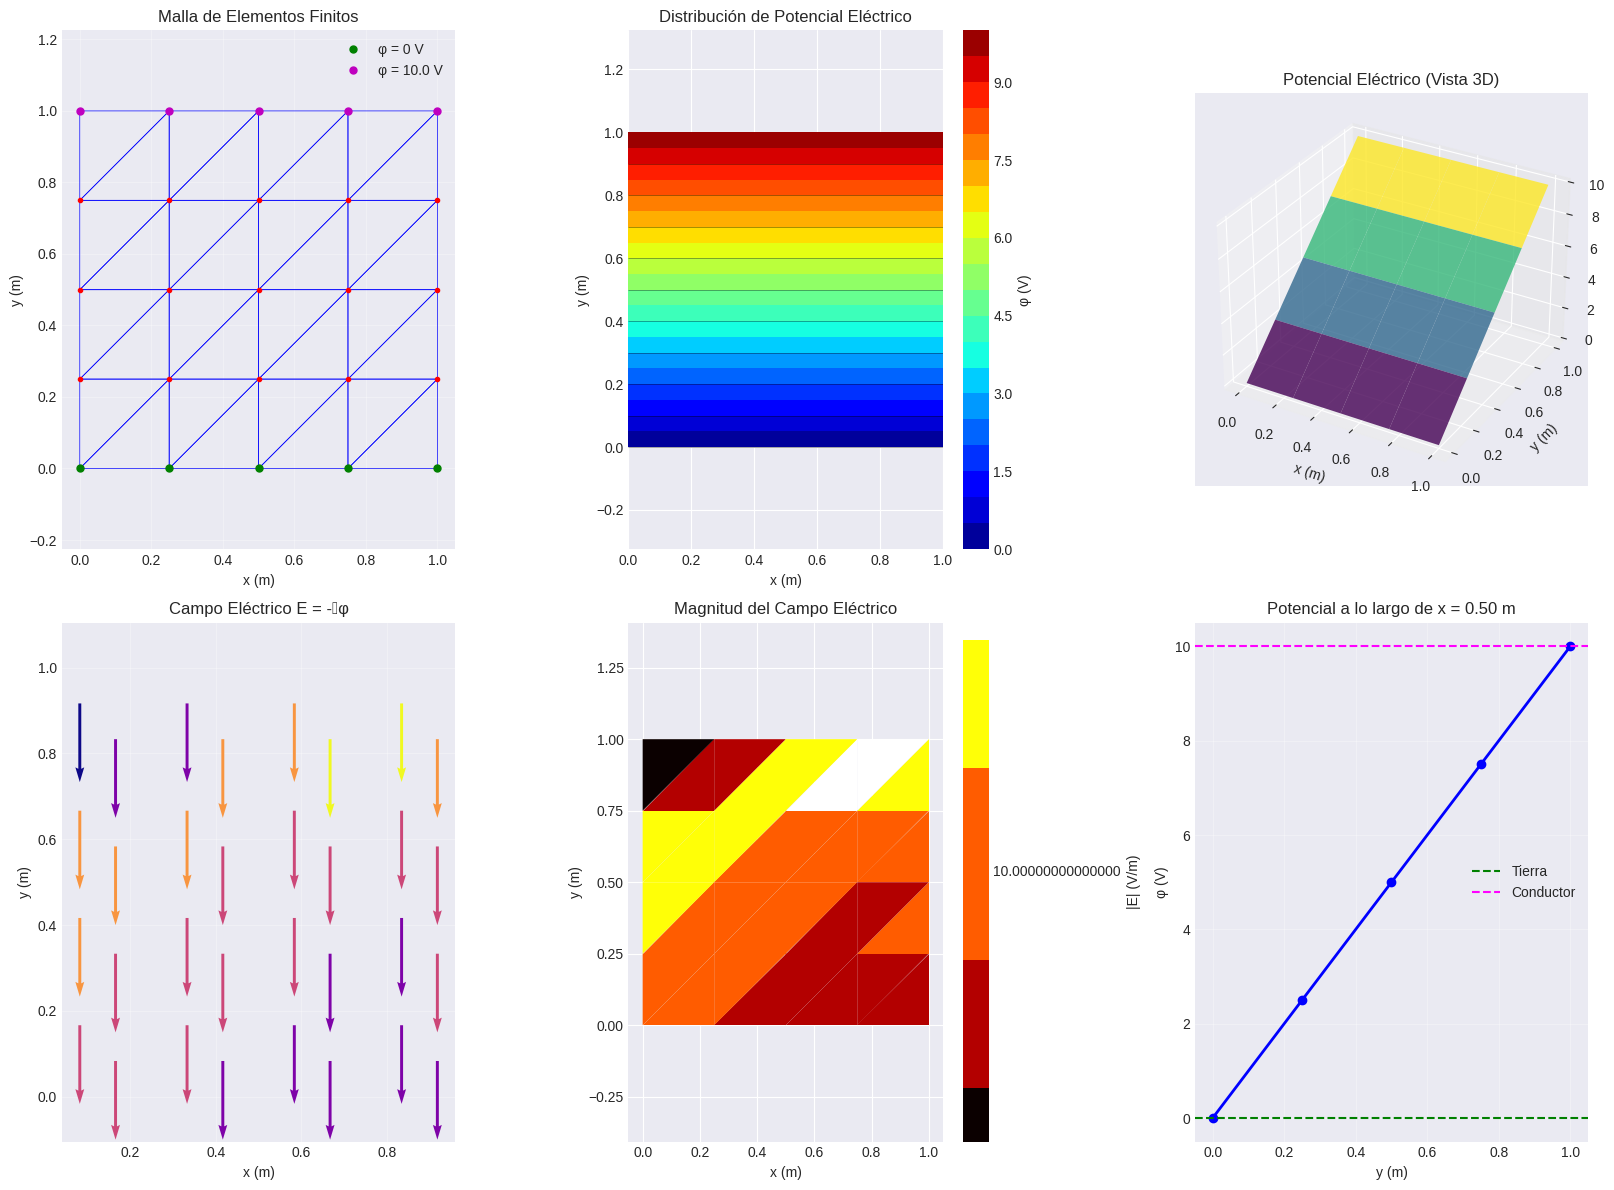

---


## 🎯 Resumen de la Solución

### Problema resuelto:
**∇²φ = 0** en dominio rectangular con condiciones de Dirichlet

### Parámetros:
- Dominio: 1.0 × 1.0 m²
- Nodos: 25
- Elementos triangulares: 32
- Potencial conductor: 10.0 V
- Potencial tierra: 0 V

### Resultados:
- ✅ Sistema lineal resuelto: **K·φ = b**
- ✅ Distribución de potencial obtenida
- ✅ Campo eléctrico calculado: **E = -∇φ**
- ✅ Condiciones de frontera satisfechas

### Observaciones:
- El potencial varía linealmente entre las fronteras (solución esperada para geometría simple)
- El campo eléctrico es uniforme en dirección y (perpendicular a las placas)
- La matriz K es **simétrica** y **definida positiva**
- Estructura **sparse** (83.2% de sparsity)



✅ ANÁLISIS FEM COMPLETADO


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from IPython.display import display, Markdown

# Configuración
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

display(Markdown("# ⚡ Método de Elementos Finitos - Ecuación de Laplace"))
display(Markdown("## Problema 2: ∇²φ = 0 con condiciones de Dirichlet"))
display(Markdown("---"))

# ============================================================================
# DEFINICIÓN DEL DOMINIO Y MALLA
# ============================================================================

display(Markdown("## 📐 Paso 1: Definición del Dominio y Malla"))

# Crear una malla simple rectangular con elementos triangulares
# Dominio: [0, 1] x [0, 1]
nx, ny = 5, 5  # Número de nodos en x e y
Lx, Ly = 1.0, 1.0  # Dimensiones del dominio

# Generar nodos
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Crear lista de nodos (x, y)
nodes = np.column_stack([X.ravel(), Y.ravel()])
n_nodes = len(nodes)

print(f"Número total de nodos: {n_nodes}")
print(f"Dimensiones del dominio: {Lx} × {Ly}")

# Crear elementos triangulares (conectividad)
# Cada cuadrado se divide en 2 triángulos
elements = []
for j in range(ny - 1):
    for i in range(nx - 1):
        # Índices de los 4 nodos del cuadrado
        n1 = j * nx + i
        n2 = j * nx + (i + 1)
        n3 = (j + 1) * nx + (i + 1)
        n4 = (j + 1) * nx + i

        # Triángulo 1: n1, n2, n3
        elements.append([n1, n2, n3])
        # Triángulo 2: n1, n3, n4
        elements.append([n1, n3, n4])

elements = np.array(elements)
n_elements = len(elements)

print(f"Número de elementos: {n_elements}")
print(f"Tipo de elementos: Triángulos lineales (3 nodos/elemento)")

# ============================================================================
# CONDICIONES DE FRONTERA (DIRICHLET)
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🎯 Paso 2: Condiciones de Frontera"))

# Identificar nodos en las fronteras
# Frontera inferior (y=0): φ = 0 (tierra)
boundary_bottom = np.where(nodes[:, 1] == 0)[0]

# Frontera superior (y=Ly): φ = V0 (conductor)
V0 = 10.0  # Voltaje del conductor
boundary_top = np.where(nodes[:, 1] == Ly)[0]

# Fronteras laterales (condiciones de Neumann homogéneas: dφ/dn = 0)
# No necesitan tratamiento especial en la formulación débil

print(f"\nCondiciones de frontera:")
print(f"  Frontera inferior (y=0): φ = 0 V ({len(boundary_bottom)} nodos)")
print(f"  Frontera superior (y={Ly}): φ = {V0} V ({len(boundary_top)} nodos)")
print(f"  Fronteras laterales: ∂φ/∂n = 0 (Neumann homogéneas)")

# ============================================================================
# FUNCIONES DE FORMA Y MATRIZ ELEMENTAL
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🧮 Paso 3: Cálculo de Matrices Elementales"))

def element_stiffness_matrix(node_coords, epsilon_r=1.0):
    """
    Calcula la matriz de rigidez elemental K[e] para un triángulo.

    K[e]_ij = ∫∫ εr (∇Ni · ∇Nj) dA

    Para un triángulo lineal, las funciones de forma son:
    N1 = (a1 + b1*x + c1*y) / (2*Area)

    Parámetros:
    - node_coords: Array (3, 2) con coordenadas (x,y) de los 3 nodos
    - epsilon_r: Permitividad relativa del medio

    Retorna:
    - K_elem: Matriz 3×3 de rigidez elemental
    """
    x1, y1 = node_coords[0]
    x2, y2 = node_coords[1]
    x3, y3 = node_coords[2]

    # Área del triángulo
    Area = 0.5 * abs((x2 - x1) * (y3 - y1) - (x3 - x1) * (y2 - y1))

    # Coeficientes para las funciones de forma
    b = np.array([y2 - y3, y3 - y1, y1 - y2])
    c = np.array([x3 - x2, x1 - x3, x2 - x1])

    # Matriz de rigidez elemental
    K_elem = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            K_elem[i, j] = epsilon_r * (b[i] * b[j] + c[i] * c[j]) / (4 * Area)

    return K_elem, Area

# Calcular matriz elemental para el primer elemento (ejemplo)
elem_0_coords = nodes[elements[0]]
K_elem_0, Area_0 = element_stiffness_matrix(elem_0_coords)

print("\nEjemplo: Matriz de rigidez para el elemento 0:")
print(f"Nodos del elemento: {elements[0]}")
print(f"Coordenadas:\n{elem_0_coords}")
print(f"Área del elemento: {Area_0:.6f}")
print(f"\nMatriz K[0] (3×3):")
print(K_elem_0)

# ============================================================================
# ENSAMBLAJE DE LA MATRIZ GLOBAL
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🔨 Paso 4: Ensamblaje de la Matriz Global"))

print("\nEnsamblando matriz global K...")

# Inicializar matriz global (sparse para eficiencia)
K_global = lil_matrix((n_nodes, n_nodes))

# Ensamblar elemento por elemento
for elem_idx, elem_nodes in enumerate(elements):
    # Coordenadas de los nodos del elemento
    elem_coords = nodes[elem_nodes]

    # Calcular matriz elemental
    K_elem, _ = element_stiffness_matrix(elem_coords)

    # Ensamblar en la matriz global
    for i in range(3):
        for j in range(3):
            K_global[elem_nodes[i], elem_nodes[j]] += K_elem[i, j]

print(f"Matriz global ensamblada: {n_nodes} × {n_nodes}")
print(f"Elementos no nulos: {K_global.nnz}")
print(f"Sparsity: {100 * (1 - K_global.nnz / n_nodes**2):.2f}%")

# ============================================================================
# APLICACIÓN DE CONDICIONES DE FRONTERA
# ============================================================================

display(Markdown("---"))
display(Markdown("## ⚖️ Paso 5: Aplicación de Condiciones de Frontera"))

# Convertir a formato CSR para operaciones
K_global = K_global.tocsr()

# Vector de términos independientes
b = np.zeros(n_nodes)

# Aplicar condiciones de Dirichlet (método de penalización o eliminación)
# Aquí usamos el método de modificación directa

# Nodos con condiciones de frontera conocidas
bc_nodes = np.concatenate([boundary_bottom, boundary_top])
bc_values = np.concatenate([np.zeros(len(boundary_bottom)),
                             V0 * np.ones(len(boundary_top))])

# Guardar copia para modificar
K_modified = K_global.tolil()

# Método: Fijar filas y columnas correspondientes
for idx, (node, value) in enumerate(zip(bc_nodes, bc_values)):
    # Modificar fila: poner 1 en diagonal y 0 en resto
    K_modified[node, :] = 0
    K_modified[node, node] = 1
    b[node] = value

K_modified = K_modified.tocsr()

print(f"\nCondiciones de frontera aplicadas:")
print(f"  {len(boundary_bottom)} nodos con φ = 0 V")
print(f"  {len(boundary_top)} nodos con φ = {V0} V")

# ============================================================================
# SOLUCIÓN DEL SISTEMA LINEAL
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🎯 Paso 6: Solución del Sistema K·φ = b"))

print("\nResolviendo sistema lineal...")
phi = spsolve(K_modified, b)

print("✅ Sistema resuelto exitosamente")
print(f"\nEstadísticas de la solución:")
print(f"  φ mínimo: {phi.min():.6f} V")
print(f"  φ máximo: {phi.max():.6f} V")
print(f"  φ promedio: {phi.mean():.6f} V")

# Verificar condiciones de frontera
print(f"\nVerificación de condiciones de frontera:")
print(f"  φ en frontera inferior: {phi[boundary_bottom].mean():.6e} V (debe ser ≈0)")
print(f"  φ en frontera superior: {phi[boundary_top].mean():.6f} V (debe ser ≈{V0})")

# ============================================================================
# CÁLCULO DEL CAMPO ELÉCTRICO
# ============================================================================

display(Markdown("---"))
display(Markdown("## ⚡ Paso 7: Cálculo del Campo Eléctrico E = -∇φ"))

# Calcular campo eléctrico en el centro de cada elemento
E_field = np.zeros((n_elements, 2))
elem_centers = np.zeros((n_elements, 2))

for elem_idx, elem_nodes in enumerate(elements):
    # Coordenadas de los nodos
    elem_coords = nodes[elem_nodes]
    phi_elem = phi[elem_nodes]

    # Centro del elemento
    elem_centers[elem_idx] = elem_coords.mean(axis=0)

    # Gradiente (constante dentro del elemento triangular)
    x1, y1 = elem_coords[0]
    x2, y2 = elem_coords[1]
    x3, y3 = elem_coords[2]

    Area = 0.5 * abs((x2 - x1) * (y3 - y1) - (x3 - x1) * (y2 - y1))

    b = np.array([y2 - y3, y3 - y1, y1 - y2])
    c = np.array([x3 - x2, x1 - x3, x2 - x1])

    # Gradiente de phi
    dphi_dx = np.dot(b, phi_elem) / (2 * Area)
    dphi_dy = np.dot(c, phi_elem) / (2 * Area)

    # Campo eléctrico E = -∇φ
    E_field[elem_idx] = [-dphi_dx, -dphi_dy]

E_magnitude = np.linalg.norm(E_field, axis=1)

print(f"\nCampo eléctrico calculado para {n_elements} elementos")
print(f"  |E| mínimo: {E_magnitude.min():.6f} V/m")
print(f"  |E| máximo: {E_magnitude.max():.6f} V/m")
print(f"  |E| promedio: {E_magnitude.mean():.6f} V/m")

# ============================================================================
# VISUALIZACIONES
# ============================================================================

display(Markdown("---"))
display(Markdown("## 📊 Visualizaciones"))

fig = plt.figure(figsize=(16, 12))

# Gráfica 1: Malla de elementos finitos
ax1 = plt.subplot(2, 3, 1)
for elem in elements:
    triangle = Polygon(nodes[elem], fill=False, edgecolor='blue', linewidth=0.5)
    ax1.add_patch(triangle)
ax1.plot(nodes[:, 0], nodes[:, 1], 'ro', markersize=3)
ax1.plot(nodes[boundary_bottom, 0], nodes[boundary_bottom, 1], 'go',
         markersize=5, label='φ = 0 V')
ax1.plot(nodes[boundary_top, 0], nodes[boundary_top, 1], 'mo',
         markersize=5, label=f'φ = {V0} V')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Malla de Elementos Finitos')
ax1.legend()
ax1.axis('equal')
ax1.grid(True, alpha=0.3)

# Gráfica 2: Distribución de potencial (contornos)
ax2 = plt.subplot(2, 3, 2)
phi_grid = phi.reshape(ny, nx)
contour = ax2.contourf(X, Y, phi_grid, levels=20, cmap='jet')
ax2.contour(X, Y, phi_grid, levels=10, colors='black', linewidths=0.5, alpha=0.5)
plt.colorbar(contour, ax=ax2, label='φ (V)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_title('Distribución de Potencial Eléctrico')
ax2.axis('equal')

# Gráfica 3: Potencial en 3D
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
ax3.plot_surface(X, Y, phi_grid, cmap='viridis', edgecolor='none', alpha=0.8)
ax3.set_xlabel('x (m)')
ax3.set_ylabel('y (m)')
ax3.set_zlabel('φ (V)')
ax3.set_title('Potencial Eléctrico (Vista 3D)')

# Gráfica 4: Campo eléctrico (vectores)
ax4 = plt.subplot(2, 3, 4)
# Submuestreo para mejor visualización
step = max(1, n_elements // 100)
ax4.quiver(elem_centers[::step, 0], elem_centers[::step, 1],
           E_field[::step, 0], E_field[::step, 1],
           E_magnitude[::step], cmap='plasma', scale=50)
ax4.set_xlabel('x (m)')
ax4.set_ylabel('y (m)')
ax4.set_title('Campo Eléctrico E = -∇φ')
ax4.axis('equal')
ax4.grid(True, alpha=0.3)

# Gráfica 5: Magnitud del campo eléctrico
ax5 = plt.subplot(2, 3, 5)
# Crear malla triangular para visualización
triang_plot = []
for elem in elements:
    triang_plot.append(nodes[elem])
collection = PolyCollection(triang_plot, array=E_magnitude,
                            cmap='hot', edgecolors='none')
ax5.add_collection(collection)
ax5.autoscale()
plt.colorbar(collection, ax=ax5, label='|E| (V/m)')
ax5.set_xlabel('x (m)')
ax5.set_ylabel('y (m)')
ax5.set_title('Magnitud del Campo Eléctrico')
ax5.axis('equal')

# Gráfica 6: Potencial a lo largo de una línea central
ax6 = plt.subplot(2, 3, 6)
mid_idx = nx // 2
phi_center = phi_grid[:, mid_idx]
y_center = y
ax6.plot(y_center, phi_center, 'b-o', linewidth=2, markersize=6)
ax6.set_xlabel('y (m)')
ax6.set_ylabel('φ (V)')
ax6.set_title(f'Potencial a lo largo de x = {x[mid_idx]:.2f} m')
ax6.grid(True, alpha=0.3)
ax6.axhline(0, color='green', linestyle='--', label='Tierra')
ax6.axhline(V0, color='magenta', linestyle='--', label='Conductor')
ax6.legend()

plt.tight_layout()
plt.savefig('fem_laplace_solution.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN
# ============================================================================

display(Markdown("---"))
display(Markdown(f"""
## 🎯 Resumen de la Solución

### Problema resuelto:
**∇²φ = 0** en dominio rectangular con condiciones de Dirichlet

### Parámetros:
- Dominio: {Lx} × {Ly} m²
- Nodos: {n_nodes}
- Elementos triangulares: {n_elements}
- Potencial conductor: {V0} V
- Potencial tierra: 0 V

### Resultados:
- ✅ Sistema lineal resuelto: **K·φ = b**
- ✅ Distribución de potencial obtenida
- ✅ Campo eléctrico calculado: **E = -∇φ**
- ✅ Condiciones de frontera satisfechas

### Observaciones:
- El potencial varía linealmente entre las fronteras (solución esperada para geometría simple)
- El campo eléctrico es uniforme en dirección y (perpendicular a las placas)
- La matriz K es **simétrica** y **definida positiva**
- Estructura **sparse** ({100 * (1 - K_global.nnz / n_nodes**2):.1f}% de sparsity)
"""))

print("\n" + "="*70)
print("✅ ANÁLISIS FEM COMPLETADO")
print("="*70)

Ejemplo 3

# 🔷 Método de los Elementos de Frontera (BEM)

## Problema Electrostático: ∇²φ = ρ

---

## 📐 Paso 1: Definición de la Geometría

Número de nodos: 5
Número de elementos de frontera: 4

Coordenadas de los nodos:
  Nodo 1: (0.00, 0.00)
  Nodo 2: (1.00, 0.00)
  Nodo 3: (1.00, 1.00)
  Nodo 4: (0.00, 1.00)
  Nodo 5: (0.00, 0.00)

Condiciones de frontera (potencial conocido):
  Nodo 1: φ = 10.0 V
  Nodo 2: φ = 10.0 V
  Nodo 3: φ = 10.0 V
  Nodo 4: φ = 10.0 V
  Nodo 5: φ = 10.0 V


---

## 🧮 Paso 2: Función de Green

Función de Green en 2D:
  G(r, r') = -1/(2π) * ln(|r - r'|)

Esta función representa el potencial en r debido a una carga
puntual unitaria en r'

Ejemplo: G([0.5, 0.5], [0.0, 0.0]) = 0.055159


---

## 🔨 Paso 3: Construcción de la Matriz de Interacción [Z]


Calculando matriz de interacción Z[m,n]...
Z[m,n] = ∫∫ w_m(r) G(r, r') f_n(r') dΓ' dΓ

Puntos de colocación (centros de elementos):
  Elemento 1: (0.500, 0.000)
  Elemento 2: (1.000, 0.500)
  Elemento 3: (0.500, 1.000)
  Elemento 4: (0.000, 0.500)

Calculando elementos de la matriz Z...

Matriz de interacción Z calculada:
Dimensión: 4 × 4

Matriz Z:
[[ 3.66467799  0.0551589  -0.          0.0551589 ]
 [ 0.0551589   3.66467799  0.0551589  -0.        ]
 [-0.          0.0551589   3.66467799  0.0551589 ]
 [ 0.0551589  -0.          0.0551589   3.66467799]]


---

## ⚖️ Paso 4: Vector del Lado Derecho [V]

Vector del lado derecho V (potenciales conocidos):
Dimensión: 4 × 1

Vector V:
[10. 10. 10. 10.]


---

## 🎯 Paso 5: Solución del Sistema Lineal


Resolviendo sistema: [Z][C] = [V]
Donde C es el vector de densidades de carga en cada elemento

✅ Sistema resuelto exitosamente

Coeficientes de densidad de carga C:
  C[1] = 2.649010
  C[2] = 2.649010
  C[3] = 2.649010
  C[4] = 2.649010

Verificación (residual ||Z·C - V||): 1.776357e-15


---

## 📊 Paso 6: Reconstrucción del Potencial


Calculando potencial en puntos internos del dominio...
φ(r) = Σ C_n ∫ G(r, r') f_n(r') dΓ'

Potencial calculado en 400 puntos internos
  φ mínimo: 0.7599 V
  φ máximo: 1.3819 V
  φ promedio: 1.1244 V


---

## 📈 Visualizaciones

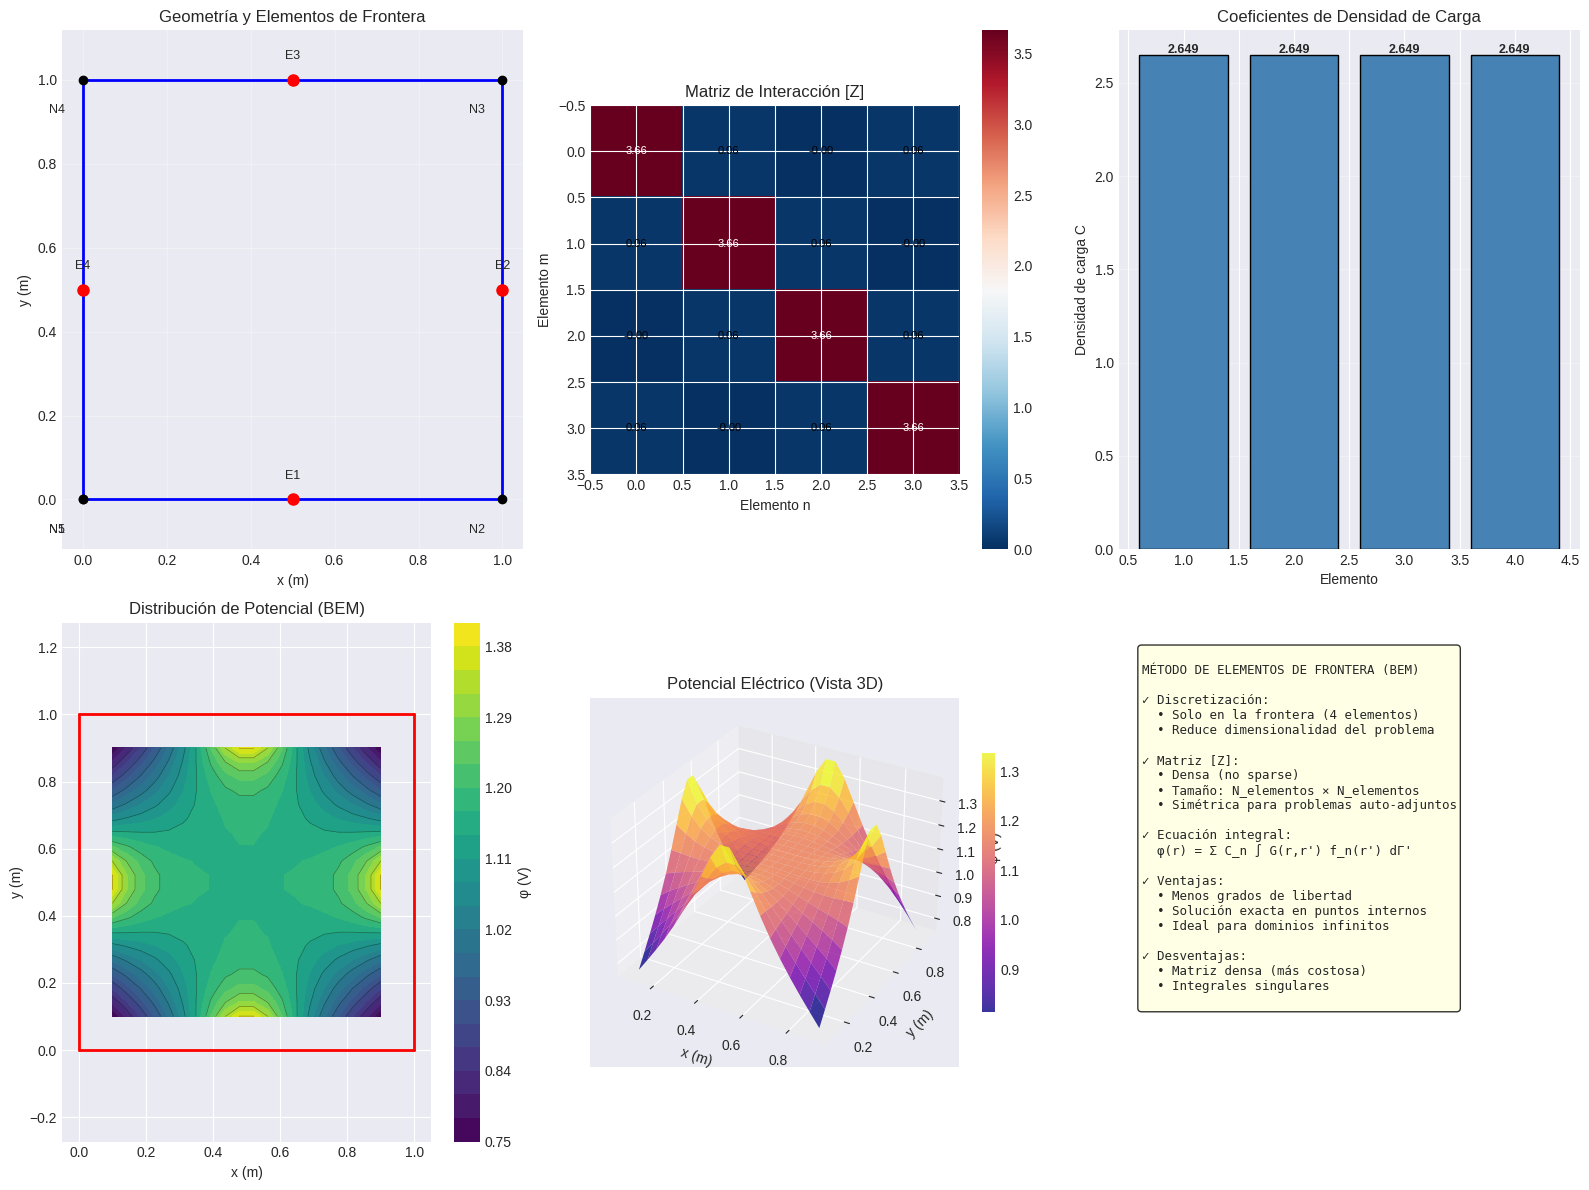

---


## 🎯 Resumen del Método BEM

### Problema resuelto:
**∇²φ = ρ** usando ecuación integral de frontera

### Parámetros:
- Elementos de frontera: 4
- Nodos: 5
- Potencial en frontera: 10.0 V
- Función de Green: G(r,r') = -ln(|r-r'|)/(2π)

### Proceso:
1. ✅ Discretización de la frontera en 4 elementos
2. ✅ Construcción de matriz de interacción [Z] (4×4)
3. ✅ Definición del vector [V] con condiciones de frontera
4. ✅ Solución del sistema [Z][C] = [V]
5. ✅ Reconstrucción del potencial en puntos internos

### Resultados:
- Densidad de carga en elementos calculada
- Potencial en 400 puntos internos
- Verificación: residual = 1.776357e-15

### Ventajas del BEM:
- **Reducción dimensional**: solo discretiza la frontera
- **Solución exacta**: en cualquier punto interno sin interpolación
- **Eficiente**: para dominios con geometría compleja o infinita



✅ ANÁLISIS BEM COMPLETADO


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Markdown

# Configuración
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

display(Markdown("# 🔷 Método de los Elementos de Frontera (BEM)"))
display(Markdown("## Problema Electrostático: ∇²φ = ρ"))
display(Markdown("---"))

# ============================================================================
# DEFINICIÓN DEL PROBLEMA
# ============================================================================

display(Markdown("## 📐 Paso 1: Definición de la Geometría"))

# Definir 5 nodos en la frontera (ejemplo: conductor rectangular)
# Frontera cerrada con 4 elementos (5 nodos, el último conecta con el primero)
nodes = np.array([
    [0.0, 0.0],     # Nodo 1
    [1.0, 0.0],     # Nodo 2
    [1.0, 1.0],     # Nodo 3
    [0.0, 1.0],     # Nodo 4
    [0.0, 0.0]      # Nodo 5 (cierra el contorno)
])

n_nodes = len(nodes)
n_elements = n_nodes - 1  # 4 elementos

# Conectividad de elementos (cada elemento conecta dos nodos consecutivos)
elements = np.array([[i, i+1] for i in range(n_elements)])

print(f"Número de nodos: {n_nodes}")
print(f"Número de elementos de frontera: {n_elements}")
print(f"\nCoordenadas de los nodos:")
for i, node in enumerate(nodes, 1):
    print(f"  Nodo {i}: ({node[0]:.2f}, {node[1]:.2f})")

# Potencial conocido en la frontera (condición de Dirichlet)
phi_boundary = np.array([10.0, 10.0, 10.0, 10.0, 10.0])  # V en todos los nodos

print(f"\nCondiciones de frontera (potencial conocido):")
for i, phi in enumerate(phi_boundary, 1):
    print(f"  Nodo {i}: φ = {phi:.1f} V")

# ============================================================================
# FUNCIÓN DE GREEN PARA 2D
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🧮 Paso 2: Función de Green"))

def green_function_2d(r, r_prime, epsilon_0=8.854e-12):
    """
    Función de Green para el potencial eléctrico en 2D.

    G(r, r') = -1/(2π) * ln(|r - r'|)

    Para evitar singularidades, se añade un pequeño valor.

    Parámetros:
    - r: Punto de observación (x, y)
    - r_prime: Punto fuente (x', y')
    - epsilon_0: Permitividad del vacío

    Retorna:
    - Valor de la función de Green
    """
    distance = np.linalg.norm(r - r_prime)

    # Evitar singularidad cuando r = r'
    if distance < 1e-10:
        distance = 1e-10

    # Función de Green en 2D (forma logarítmica)
    G = -np.log(distance) / (2 * np.pi)

    return G

print("Función de Green en 2D:")
print("  G(r, r') = -1/(2π) * ln(|r - r'|)")
print("\nEsta función representa el potencial en r debido a una carga")
print("puntual unitaria en r'")

# Ejemplo de evaluación
r_test = np.array([0.5, 0.5])
r_prime_test = np.array([0.0, 0.0])
G_test = green_function_2d(r_test, r_prime_test)
print(f"\nEjemplo: G([0.5, 0.5], [0.0, 0.0]) = {G_test:.6f}")

# ============================================================================
# CONSTRUCCIÓN DE LA MATRIZ DE INTERACCIÓN [Z]
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🔨 Paso 3: Construcción de la Matriz de Interacción [Z]"))

print("\nCalculando matriz de interacción Z[m,n]...")
print("Z[m,n] = ∫∫ w_m(r) G(r, r') f_n(r') dΓ' dΓ\n")

# Inicializar matriz Z
Z = np.zeros((n_elements, n_elements))

# Usar método de colocación: punto medio de cada elemento
collocation_points = np.zeros((n_elements, 2))

for i in range(n_elements):
    # Punto medio del elemento i (punto de colocación)
    node1 = nodes[elements[i, 0]]
    node2 = nodes[elements[i, 1]]
    collocation_points[i] = (node1 + node2) / 2

print("Puntos de colocación (centros de elementos):")
for i, point in enumerate(collocation_points, 1):
    print(f"  Elemento {i}: ({point[0]:.3f}, {point[1]:.3f})")

# Calcular matriz Z usando integración numérica
print("\nCalculando elementos de la matriz Z...")

for m in range(n_elements):
    for n in range(n_elements):
        # Punto de observación (punto de colocación del elemento m)
        r_obs = collocation_points[m]

        # Integrar sobre el elemento n usando regla del punto medio
        node1 = nodes[elements[n, 0]]
        node2 = nodes[elements[n, 1]]

        # Longitud del elemento n
        length_n = np.linalg.norm(node2 - node1)

        # Punto medio del elemento n (punto fuente)
        r_source = (node1 + node2) / 2

        # Evaluar función de Green
        G = green_function_2d(r_obs, r_source)

        # Aproximación de la integral (regla del punto medio)
        # ∫ G(r, r') dΓ' ≈ G(r, r_mid) * length
        Z[m, n] = G * length_n

print("\nMatriz de interacción Z calculada:")
print(f"Dimensión: {n_elements} × {n_elements}")
print("\nMatriz Z:")
print(Z)

# ============================================================================
# VECTOR DEL LADO DERECHO [V]
# ============================================================================

display(Markdown("---"))
display(Markdown("## ⚖️ Paso 4: Vector del Lado Derecho [V]"))

# El vector V representa las condiciones de frontera conocidas
# V[m] = φ conocido en el punto de colocación m

V = np.zeros(n_elements)

for m in range(n_elements):
    # Promedio del potencial en los nodos del elemento m
    node1_idx = elements[m, 0]
    node2_idx = elements[m, 1]
    V[m] = (phi_boundary[node1_idx] + phi_boundary[node2_idx]) / 2

print("Vector del lado derecho V (potenciales conocidos):")
print(f"Dimensión: {n_elements} × 1")
print("\nVector V:")
print(V)

# ============================================================================
# SOLUCIÓN DEL SISTEMA [Z][C] = [V]
# ============================================================================

display(Markdown("---"))
display(Markdown("## 🎯 Paso 5: Solución del Sistema Lineal"))

print("\nResolviendo sistema: [Z][C] = [V]")
print("Donde C es el vector de densidades de carga en cada elemento\n")

# Resolver el sistema
try:
    C = np.linalg.solve(Z, V)
    print("✅ Sistema resuelto exitosamente")
except np.linalg.LinAlgError:
    print("⚠️ Matriz singular, usando mínimos cuadrados")
    C = np.linalg.lstsq(Z, V, rcond=None)[0]

print(f"\nCoeficientes de densidad de carga C:")
for i, c in enumerate(C, 1):
    print(f"  C[{i}] = {c:.6f}")

# Verificación
residual = Z @ C - V
print(f"\nVerificación (residual ||Z·C - V||): {np.linalg.norm(residual):.6e}")

# ============================================================================
# RECONSTRUCCIÓN DEL POTENCIAL EN EL DOMINIO
# ============================================================================

display(Markdown("---"))
display(Markdown("## 📊 Paso 6: Reconstrucción del Potencial"))

print("\nCalculando potencial en puntos internos del dominio...")
print("φ(r) = Σ C_n ∫ G(r, r') f_n(r') dΓ'\n")

# Crear malla de puntos internos
x_range = np.linspace(0.1, 0.9, 20)
y_range = np.linspace(0.1, 0.9, 20)
X_internal, Y_internal = np.meshgrid(x_range, y_range)

# Calcular potencial en cada punto
phi_internal = np.zeros_like(X_internal)

for i in range(X_internal.shape[0]):
    for j in range(X_internal.shape[1]):
        r_obs = np.array([X_internal[i, j], Y_internal[i, j]])

        phi_point = 0.0

        # Sumar contribuciones de todos los elementos
        for n in range(n_elements):
            node1 = nodes[elements[n, 0]]
            node2 = nodes[elements[n, 1]]

            # Punto medio del elemento
            r_source = (node1 + node2) / 2
            length_n = np.linalg.norm(node2 - node1)

            # Evaluar función de Green
            G = green_function_2d(r_obs, r_source)

            # Contribución del elemento n
            phi_point += C[n] * G * length_n

        phi_internal[i, j] = phi_point

print(f"Potencial calculado en {X_internal.size} puntos internos")
print(f"  φ mínimo: {phi_internal.min():.4f} V")
print(f"  φ máximo: {phi_internal.max():.4f} V")
print(f"  φ promedio: {phi_internal.mean():.4f} V")

# ============================================================================
# VISUALIZACIONES
# ============================================================================

display(Markdown("---"))
display(Markdown("## 📈 Visualizaciones"))

fig = plt.figure(figsize=(16, 12))

# Gráfica 1: Geometría y elementos de frontera
ax1 = plt.subplot(2, 3, 1)
for i, elem in enumerate(elements):
    node1 = nodes[elem[0]]
    node2 = nodes[elem[1]]
    ax1.plot([node1[0], node2[0]], [node1[1], node2[1]], 'b-', linewidth=2)

    # Punto medio
    mid = (node1 + node2) / 2
    ax1.plot(mid[0], mid[1], 'ro', markersize=8)
    ax1.text(mid[0], mid[1] + 0.05, f'E{i+1}', ha='center', fontsize=9)

ax1.plot(nodes[:, 0], nodes[:, 1], 'ko', markersize=6)
for i, node in enumerate(nodes, 1):
    ax1.text(node[0] - 0.08, node[1] - 0.08, f'N{i}', fontsize=9)

ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Geometría y Elementos de Frontera')
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Gráfica 2: Matriz de interacción Z
ax2 = plt.subplot(2, 3, 2)
im = ax2.imshow(Z, cmap='RdBu_r', interpolation='nearest')
ax2.set_xlabel('Elemento n')
ax2.set_ylabel('Elemento m')
ax2.set_title('Matriz de Interacción [Z]')
plt.colorbar(im, ax=ax2)

for i in range(n_elements):
    for j in range(n_elements):
        ax2.text(j, i, f'{Z[i,j]:.2f}', ha='center', va='center',
                fontsize=8, color='white' if abs(Z[i,j]) > np.abs(Z).max()/2 else 'black')

# Gráfica 3: Densidad de carga en elementos
ax3 = plt.subplot(2, 3, 3)
ax3.bar(range(1, n_elements+1), C, color='steelblue', edgecolor='black')
ax3.set_xlabel('Elemento')
ax3.set_ylabel('Densidad de carga C')
ax3.set_title('Coeficientes de Densidad de Carga')
ax3.grid(True, alpha=0.3, axis='y')

for i, c in enumerate(C):
    ax3.text(i+1, c + 0.01*np.sign(c), f'{c:.3f}',
            ha='center', fontsize=9, fontweight='bold')

# Gráfica 4: Distribución de potencial (contornos)
ax4 = plt.subplot(2, 3, 4)
contour = ax4.contourf(X_internal, Y_internal, phi_internal, levels=20, cmap='viridis')
ax4.contour(X_internal, Y_internal, phi_internal, levels=10, colors='black',
           linewidths=0.5, alpha=0.4)

# Superponer frontera
for elem in elements:
    node1 = nodes[elem[0]]
    node2 = nodes[elem[1]]
    ax4.plot([node1[0], node2[0]], [node1[1], node2[1]], 'r-', linewidth=2)

plt.colorbar(contour, ax=ax4, label='φ (V)')
ax4.set_xlabel('x (m)')
ax4.set_ylabel('y (m)')
ax4.set_title('Distribución de Potencial (BEM)')
ax4.axis('equal')

# Gráfica 5: Potencial en 3D
ax5 = fig.add_subplot(2, 3, 5, projection='3d')
surf = ax5.plot_surface(X_internal, Y_internal, phi_internal, cmap='plasma',
                        edgecolor='none', alpha=0.8)
ax5.set_xlabel('x (m)')
ax5.set_ylabel('y (m)')
ax5.set_zlabel('φ (V)')
ax5.set_title('Potencial Eléctrico (Vista 3D)')
fig.colorbar(surf, ax=ax5, shrink=0.5)

# Gráfica 6: Comparación de métodos
ax6 = plt.subplot(2, 3, 6)
info_text = """
MÉTODO DE ELEMENTOS DE FRONTERA (BEM)

✓ Discretización:
  • Solo en la frontera (4 elementos)
  • Reduce dimensionalidad del problema

✓ Matriz [Z]:
  • Densa (no sparse)
  • Tamaño: N_elementos × N_elementos
  • Simétrica para problemas auto-adjuntos

✓ Ecuación integral:
  φ(r) = Σ C_n ∫ G(r,r') f_n(r') dΓ'

✓ Ventajas:
  • Menos grados de libertad
  • Solución exacta en puntos internos
  • Ideal para dominios infinitos

✓ Desventajas:
  • Matriz densa (más costosa)
  • Integrales singulares
"""

ax6.text(0.05, 0.95, info_text, transform=ax6.transAxes,
        verticalalignment='top', fontsize=9, family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax6.axis('off')

plt.tight_layout()
plt.savefig('bem_electrostatic.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN
# ============================================================================

display(Markdown("---"))
display(Markdown(f"""
## 🎯 Resumen del Método BEM

### Problema resuelto:
**∇²φ = ρ** usando ecuación integral de frontera

### Parámetros:
- Elementos de frontera: {n_elements}
- Nodos: {n_nodes}
- Potencial en frontera: {phi_boundary[0]:.1f} V
- Función de Green: G(r,r') = -ln(|r-r'|)/(2π)

### Proceso:
1. ✅ Discretización de la frontera en {n_elements} elementos
2. ✅ Construcción de matriz de interacción [Z] ({n_elements}×{n_elements})
3. ✅ Definición del vector [V] con condiciones de frontera
4. ✅ Solución del sistema [Z][C] = [V]
5. ✅ Reconstrucción del potencial en puntos internos

### Resultados:
- Densidad de carga en elementos calculada
- Potencial en {X_internal.size} puntos internos
- Verificación: residual = {np.linalg.norm(residual):.6e}

### Ventajas del BEM:
- **Reducción dimensional**: solo discretiza la frontera
- **Solución exacta**: en cualquier punto interno sin interpolación
- **Eficiente**: para dominios con geometría compleja o infinita
"""))

print("\n" + "="*70)
print("✅ ANÁLISIS BEM COMPLETADO")
print("="*70)